In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy, pandas, matplotlib, seaborn, datetime packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Reading and Inspection

-  ### Import and read Data

Importing and reading the 'Uber' database.

In [3]:
uber = pd.read_csv('Uber Request Data.csv')
uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1

-  ### Inspecting the dataframe

Inspecting the dataframe's columns, shapes, variable types etc.

In [4]:
uber.shape

(6745, 6)

In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
uber.describe()

Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

## Cleaning the Data

-  ### Inspecting Null values


In [7]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# Get the row-wise Null count the same way. This time just specify the axis as 1

uber.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6715    2
6716    2
6717    2
6718    2
6719    2
6720    2
6721    2
6722    2
6723    2
6724    2
6725    2
6726    2
6727    2
6728    2
6729    2
6730    2
6731    2
6732    2
6733    2
6734    2
6735    2
6736    2
6737    2
6738    2
6739    2
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [9]:
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

-  ### Identifying the data quality issues and cleaning the data


In [10]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], errors='ignore', dayfirst=True)

In [11]:
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], errors='ignore', dayfirst=True)
uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp  
0    2016-07-11 11:51:00 2016-07-11 13:00:00  
1    

In [12]:
uber.info()     #checking the data type of columns 'Request timestamp' and 'Drop timestamp'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


-  ### Deriving new variables

In [13]:
uber['Request time'] = uber['Request timestamp'].dt.time   #extracting time from the column 'request timestamp'
uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request time  
0    2016-07-11 11:51:00 2016-07-11 13:

In [14]:
uber['Drop time'] = uber['Drop timestamp'].dt.time     #extracting time from the column 'Drop timestamp'
uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request time Drop time  
0    2016-07-11 11:51:00 2016

In [15]:
uber['Request Day'] = uber['Request timestamp'].dt.day_name()    #extracting Day from the column 'Request timestamp'
uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request time Drop time  \
0    2016-07-11 11:51:00 201

In [16]:
uber=uber.assign(timeOfDay=pd.cut(uber['Request timestamp'].dt.hour,[0, 4, 8, 11, 16, 19, 24],labels=['Late Night','Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'], right=False))
uber           #Creating time slots

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request time Drop time  \
0    2016-07-11 11:51:00 201

### Data Analysis



In [17]:
df_new= uber.loc[uber['Status'] != 'Trip Completed']    #Analysis for the frequency(count) of requests that got cancelled or showed "no cars available"
df_new

Request id Pickup point  Driver id             Status  \
2831        2905         City        1.0          Cancelled   
2832        4805         City        1.0          Cancelled   
2833        5202      Airport        1.0          Cancelled   
2834        5927         City        1.0          Cancelled   
2835        2347      Airport        2.0          Cancelled   
2836        3806      Airport        2.0          Cancelled   
2837        4451         City        2.0          Cancelled   
2838        5023      Airport        2.0          Cancelled   
2839          80         City        3.0          Cancelled   
2840         534         City        3.0          Cancelled   
2841        1867      Airport        3.0          Cancelled   
2842        4383         City        3.0          Cancelled   
2843         748         City        4.0          Cancelled   
2844        1254      Airport        4.0          Cancelled   
2845        3807      Airport        4.0          Cancelled   
2846        4280         City        4.0          Cancelled   
2847        4533         City        4.0          Cancelled   
2848        3230         City        5.0          Cancelled   
2849        4296         City        5.0          Cancelled   
2850        3059         City        6.0          Cancelled   
2851        5547         City        6.0          Cancelled   
2852        5699         City        6.0          Cancelled   
2853        5701         City        6.0          Cancelled   
2854         247         City        7.0          Cancelled   
2855        2582      Airport        7.0          Cancelled   
2856        3184         City        7.0          Cancelled   
2857        1687         City        8.0          Cancelled   
2858        4174         City        8.0          Cancelled   
2859        4335         City        8.0          Cancelled   
2860         150         City        9.0          Cancelled   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp Drop timestamp Request time Drop time Request Day  \
2831 2016-07-13 06:08

## Plot showing the frequency of requests that got Completed, Cancelled or showed 'No cars available'


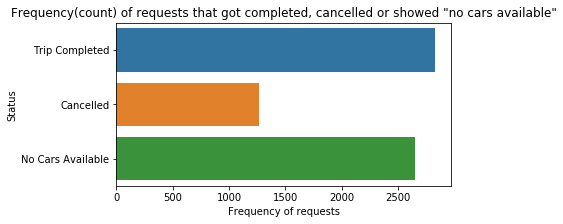

In [18]:
plt.figure(figsize=(6, 3))
sns.countplot(y="Status", data=uber)
plt.title('Frequency(count) of requests that got completed, cancelled or showed "no cars available"')
plt.ylabel('Status')
plt.xlabel('Frequency of requests')
plt.show()

### Plot showing the frequency of requests that got cancelled or showed 'no cars available' for the pickup locations- 'City to Airport' and 'Airport to City'

In [19]:
plt.figure(figsize=(3, 6))
sns.countplot(x="Pickup point", data=df_new)
plt.title('Frequency(count) of requests that got cancelled or showed "no cars available"')
plt.xlabel('Pickup Location')
plt.ylabel('Frequency of requests')
plt.show()

### Plot showing the frequency of requests that got cancelled or showed 'no cars available' for a particular time slot

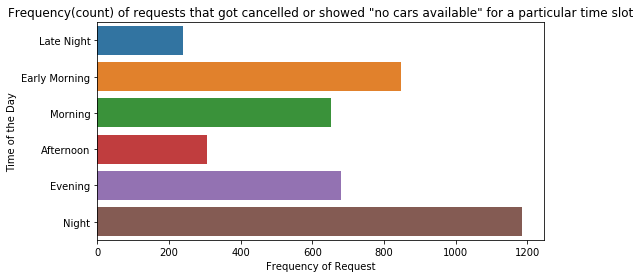

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(y="timeOfDay", data=df_new)
plt.title('Frequency(count) of requests that got cancelled or showed "no cars available" for a particular time slot')
plt.xlabel('Frequency of Request')
plt.ylabel('Time of the Day')
plt.show()

### Plot showing the Frequency of requests that got cancelled or showed 'no cars available' for a particular day

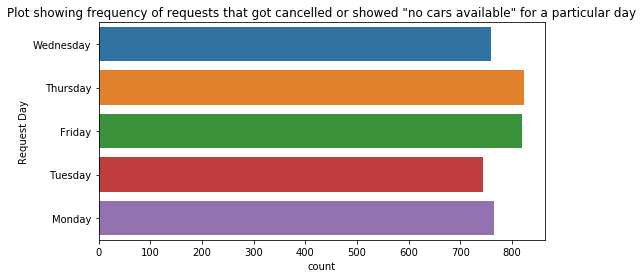

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(y="Request Day", data=df_new)
plt.title('Plot showing frequency of requests that got cancelled or showed "no cars available" for a particular day')
plt.show()

### Finding out the gap between supply and demand and showing the same using plots

In [22]:
df_chart = df_new.groupby(['timeOfDay', 'Pickup point'])['Status'].count().unstack('Pickup point').fillna(0)
df_chart

Pickup point   Airport  City
timeOfDay                   
Late Night         114   125
Early Morning       59   789
Morning             43   610
Afternoon          106   201
Evening            581   100
Night             1008   178

Text(0,0.5,'Frequency of requests')

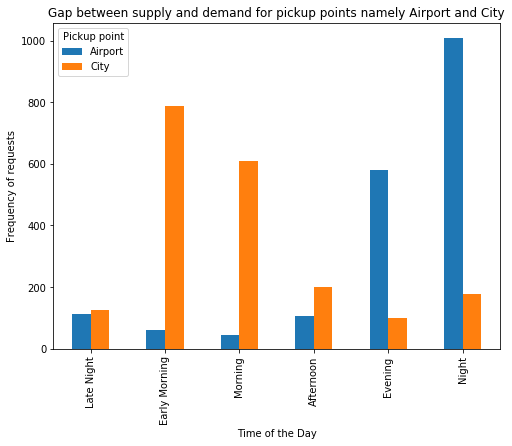

In [23]:
df_chart.plot.bar(stacked=False,title='Gap between supply and demand for pickup points namely Airport and City', figsize=(8,6))
plt.xlabel('Time of the Day')
plt.ylabel('Frequency of requests')